# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [0]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D, Reshape, BatchNormalization

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(Reshape((32,32,3),input_shape=(32,32,3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train_norm,y_train_cat,          
          validation_data=(x_test_norm,y_test_cat),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 306us/sample - loss: 1.3941 - accuracy: 0.5085 - val_loss: 1.9506 - val_accuracy: 0.3663
Epoch 2/10
50000/50000 [==============================] - 8s 156us/sample - loss: 1.1534 - accuracy: 0.5959 - val_loss: 1.1270 - val_accuracy: 0.6039
Epoch 3/10
50000/50000 [==============================] - 8s 154us/sample - loss: 1.0750 - accuracy: 0.6232 - val_loss: 1.1342 - val_accuracy: 0.6011
Epoch 4/10
50000/50000 [==============================] - 8s 156us/sample - loss: 1.0226 - accuracy: 0.6430 - val_loss: 1.2132 - val_accuracy: 0.5793
Epoch 5/10
50000/50000 [==============================] - 8s 155us/sample - loss: 0.9789 - accuracy: 0.6578 - val_loss: 1.4590 - val_accuracy: 0.5078
Epoch 6/10
50000/50000 [==============================] - 8s 156us/sample - loss: 0.9394 - accuracy: 0.6725 - val_loss: 1.4535 - val_accuracy: 0.5253
Epoch 7/10
50000/50000 [=========================

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/great-learning/lab 8/images')

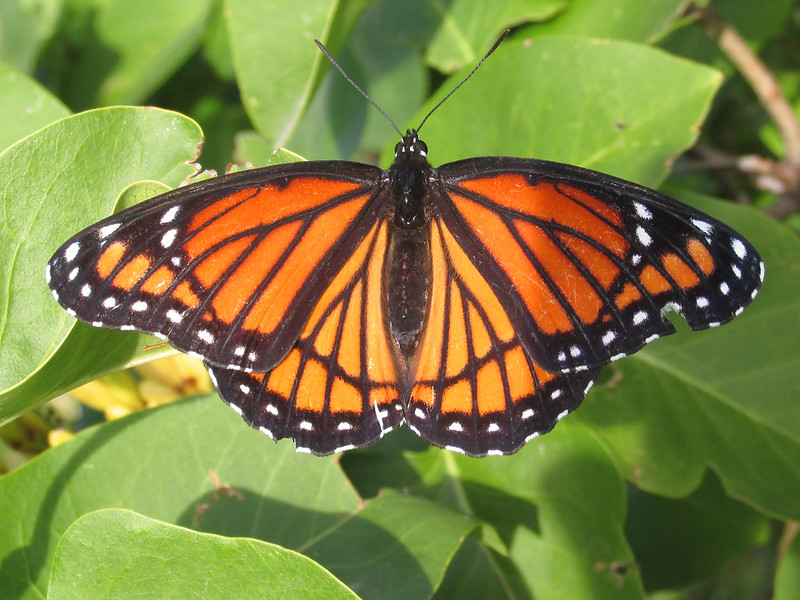

In [19]:
img = load_img('49441887332_107afa786d_c.jpg')
img


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
model_input = img.resize((224,224))
model_input = img_to_array(model_input)

In [0]:
model_input = preprocess_input(model_input)

In [0]:
model_input = model_input.reshape(1,224,224,3)

In [60]:
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
vgg = VGG16(include_top=True, #Should we include classification Layers
                              weights='imagenet', #Load imagenet weights, 'None' will load random weights
                              input_shape=(224,224,3)) #Input image size

In [0]:
predictions = vgg.predict(model_input)

labels = decode_predictions(predictions)
label = labels[0][0]

In [79]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

monarch (99.72%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/great-learning/lab 8/tweets.csv', encoding = "ISO-8859-1")

**Drop null values**

*   Drop all the rows with null values




In [0]:
df = df.dropna()

**Print the dataframe**
*   print initial 5 rows of the data


In [120]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
df['tweet_text'] = df['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.lower())

In [0]:
df['tweet_text'] = df['tweet_text'].str.strip()

## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [0]:
df = df.loc[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | 
       (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [125]:
pd.value_counts(df['is_there_an_emotion_directed_at_a_brand_or_product'])

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion':1,'Negative emotion':0})

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

In [0]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [142]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
multinomialNB = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [145]:
multinomialNB.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
logreg_predict = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
nb_predict = multinomialNB.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [149]:
accuracy_score(y_test, logreg_predict)

0.8634085213032582

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [150]:
accuracy_score(y_test, nb_predict)

0.8646616541353384